In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data\df_clean.csv", index_col = False)

In [3]:
df.head()

trip_id  bike_id weekday  start_hour       start_time  start_station_id  \
0  LnQzQk    16013     Mon          18   9/9/2013 18:18               523   
1  IL9boN    15230     Thu          18  9/12/2013 18:38               257   
2  46clGB    17942     Wed          19  9/18/2013 19:44               479   
3  v7vdFt    19683     Sat          11  9/28/2013 11:54               527   
4  VGBsb5    18024     Sat          18   9/7/2013 18:08               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

          end_time  end_station_id     end_station_name  end_station_latitude  \
0   9/9/2013 18:35             334      W 20 St & 7 Ave             40.742388   
1  9/12/2013 18:48             236  St Marks Pl & 2 Ave             40.728419   
2  9/18/2013 19:50             513     W 56 St & 10 Ave             40.768254   
3  9/28/2013 12:03             441      E 52 St & 2 Ave             40.756014   
4   9/7/2013 18:46             476      E 31 St & 3 Ave             40.743943   

   end_station_longitude  trip_duration      subscriber  birth_year  \
0             -73.997262            993      Subscriber      1968.0   
1             -73.987140            581      Subscriber      1983.0   
2             -73.988639            361      Subscriber      1989.0   
3             -73.967416            561      Subscriber      1988.0   
4             -73.979661           2296  Non-Subscriber      1985.0   

          gender  
0              2  
1              1  
2              1  
3              2  
4  Not Available

In [4]:
# Visualising data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   trip_id                  50000 non-null  object 
 1   bike_id                  50000 non-null  int64  
 2   weekday                  50000 non-null  object 
 3   start_hour               50000 non-null  int64  
 4   start_time               50000 non-null  object 
 5   start_station_id         50000 non-null  int64  
 6   start_station_name       50000 non-null  object 
 7   start_station_latitude   50000 non-null  float64
 8   start_station_longitude  50000 non-null  float64
 9   end_time                 50000 non-null  object 
 10  end_station_id           50000 non-null  int64  
 11  end_station_name         50000 non-null  object 
 12  end_station_latitude     50000 non-null  float64
 13  end_station_longitude    50000 non-null  float64
 14  trip_duration         

In [5]:
# Convert trip_id to string
df['trip_id'] = df['trip_id'].astype(str)

In [6]:
# Convert start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [7]:
# Convert subscriber and gender to categorical
df['subscriber'] = df['subscriber'].astype('category')
df['gender'] = df['gender'].astype('category')

In [8]:
weekdays_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
df['weekday'] = df['weekday'].map(weekdays_mapping)

In [39]:
# Visualising data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   trip_id                  50000 non-null  object        
 1   bike_id                  50000 non-null  int64         
 2   weekday                  0 non-null      category      
 3   start_hour               50000 non-null  int64         
 4   start_time               50000 non-null  datetime64[ns]
 5   start_station_id         50000 non-null  int64         
 6   start_station_name       50000 non-null  object        
 7   start_station_latitude   50000 non-null  float64       
 8   start_station_longitude  50000 non-null  float64       
 9   end_time                 50000 non-null  datetime64[ns]
 10  end_station_id           50000 non-null  int64         
 11  end_station_name         50000 non-null  object        
 12  end_station_latitude     50000 n

### Correlation Heatmap

In [9]:
df_sub=df[['start_hour','trip_duration','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']]

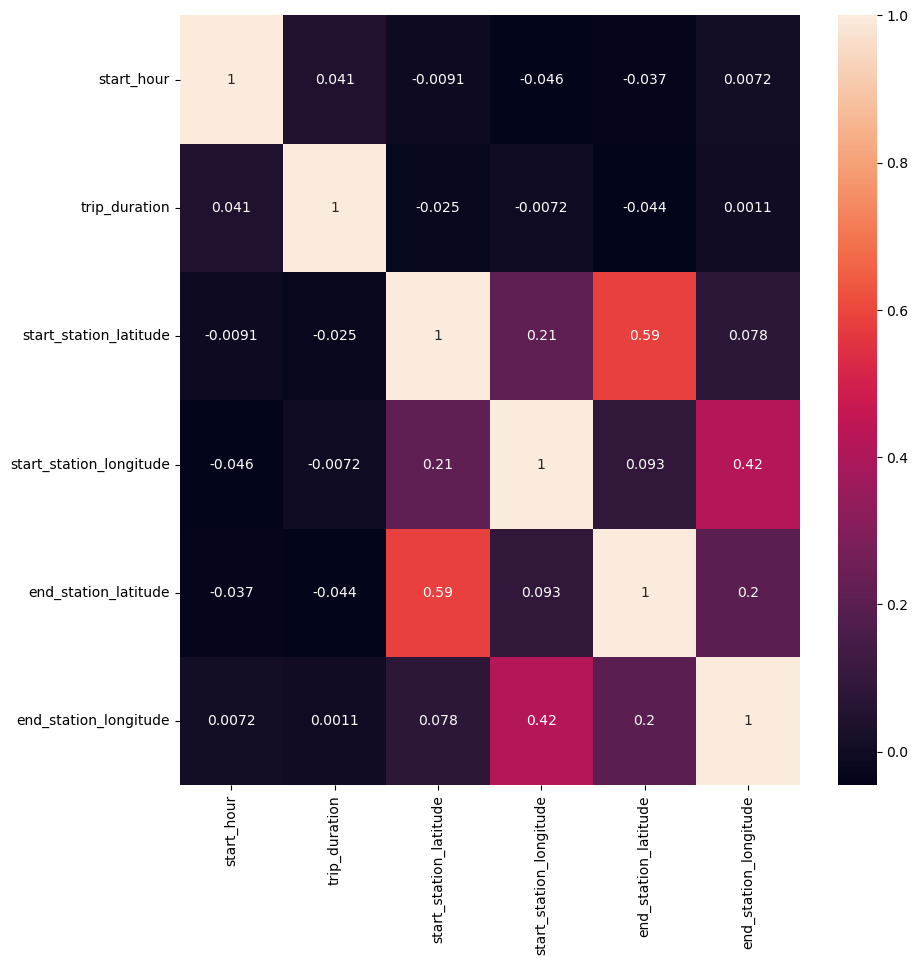

In [10]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### There is no signnificant correlation between the variables.

### Scatterplot

In [11]:
df.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


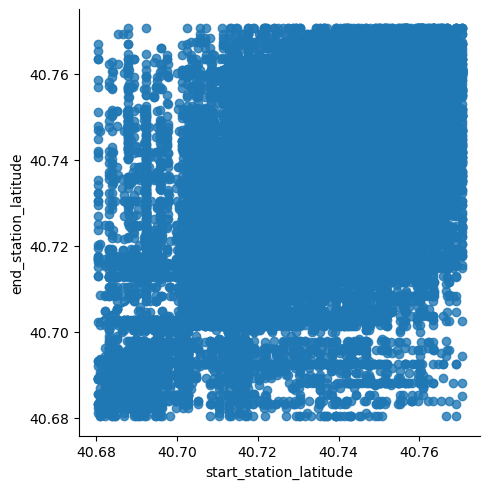

In [19]:
# Create a scatterplot for the "start_hour" and "trip_duration" columns in seaborn

sns.lmplot(x = 'start_station_latitude', y = 'end_station_latitude', data = df_sub)


### In the scatterplot, you can see that while there is, indeed, a week positive relationship, the trend line isn’t very steep, and there are many points far away from this line.

In [15]:
trip_count_by_station = df.groupby('start_station_id')['trip_id'].count().reset_index()

<Axes: xlabel='start_station_id', ylabel='trip_id'>

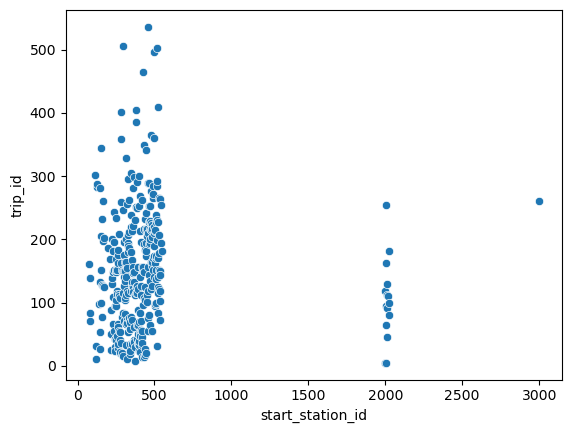

In [17]:
sns.scatterplot(x='start_station_id', y='trip_id', data=trip_count_by_station)

C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


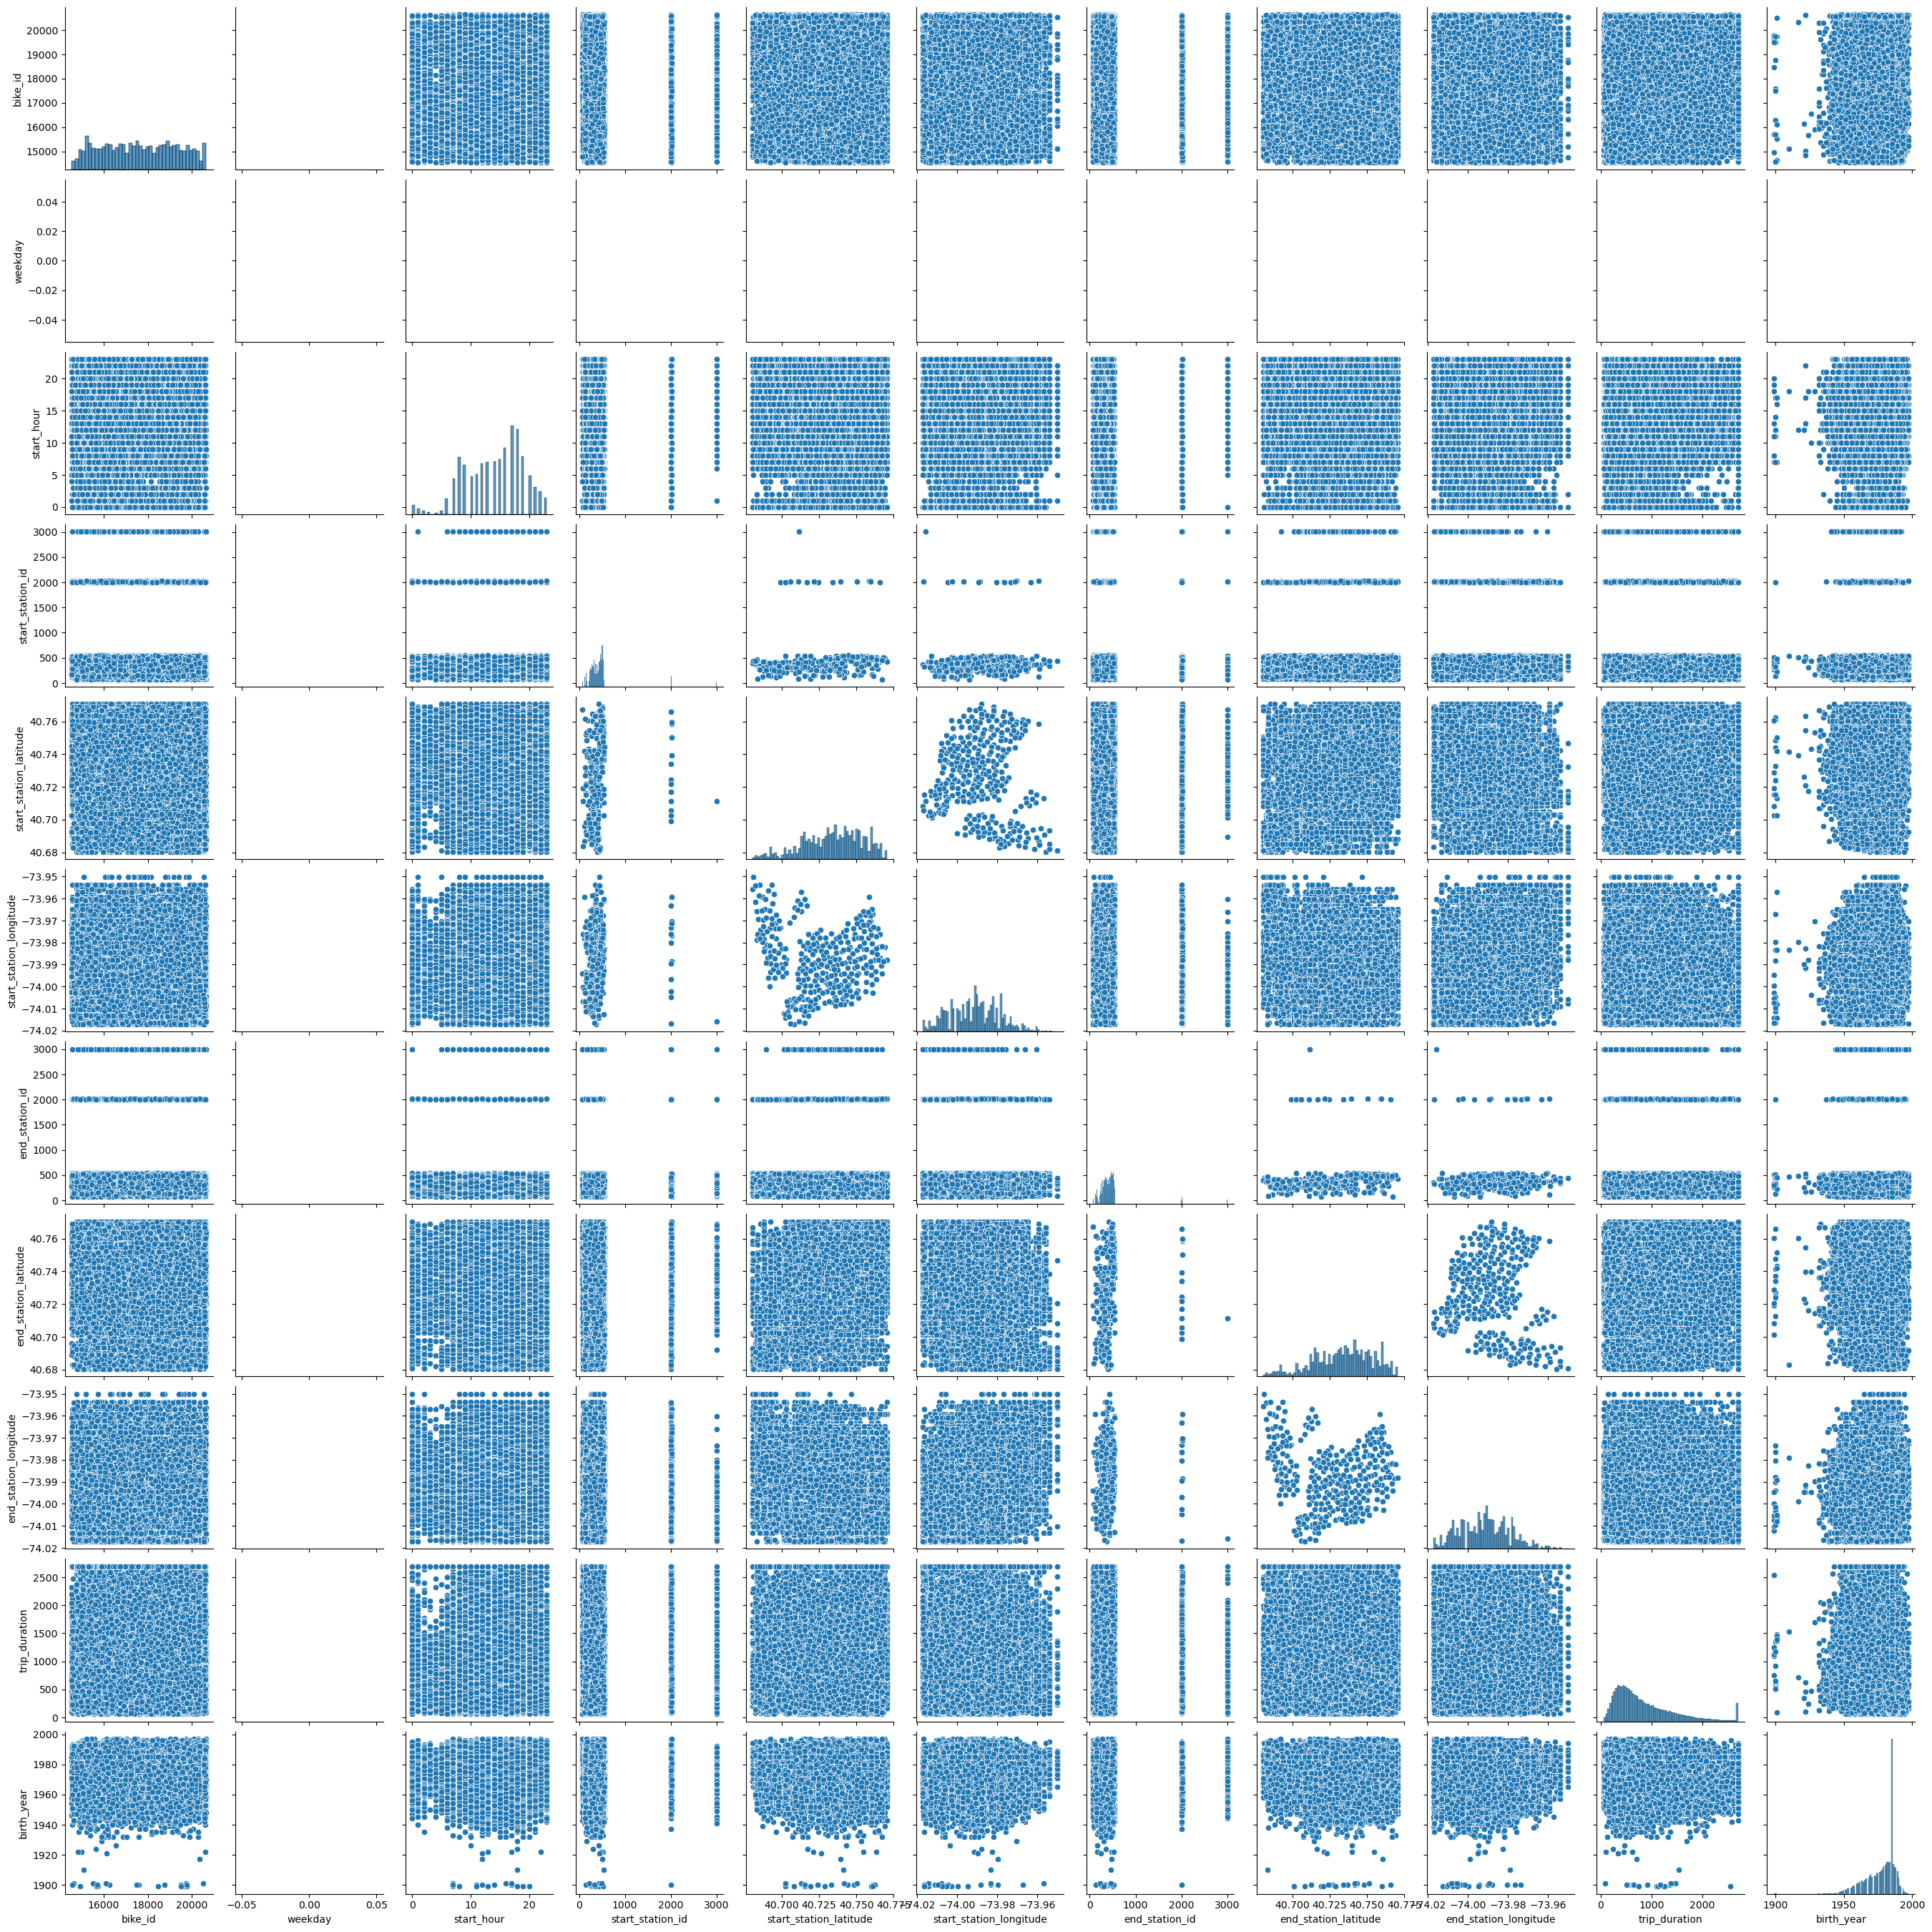

In [18]:
# Create a pair plot of entire dataset
g = sns.pairplot(df)

### Create a categorical plot and interpret the results.

C:\Users\charan.lalwani\AppData\Local\Temp\ipykernel_13580\1316972713.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x='subscriber', y='trip_duration', kind='bar', data=df, estimator='mean', ci=None)
C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

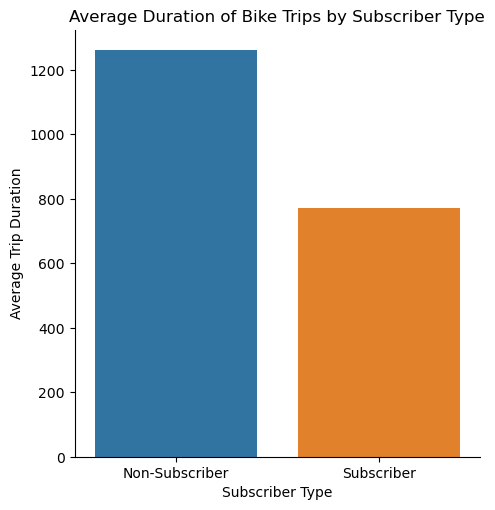

In [21]:

plt.figure(figsize=(12, 8))
sns.catplot(x='subscriber', y='trip_duration', kind='bar', data=df, estimator='mean', ci=None)


plt.title('Average Duration of Bike Trips by Subscriber Type')
plt.xlabel('Subscriber Type')
plt.ylabel('Average Trip Duration')

plt.show()

In [40]:
# Calculate age and create age groups
current_year = pd.to_datetime('now').year
df['age'] = current_year - df['birth_year']
bins = [18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


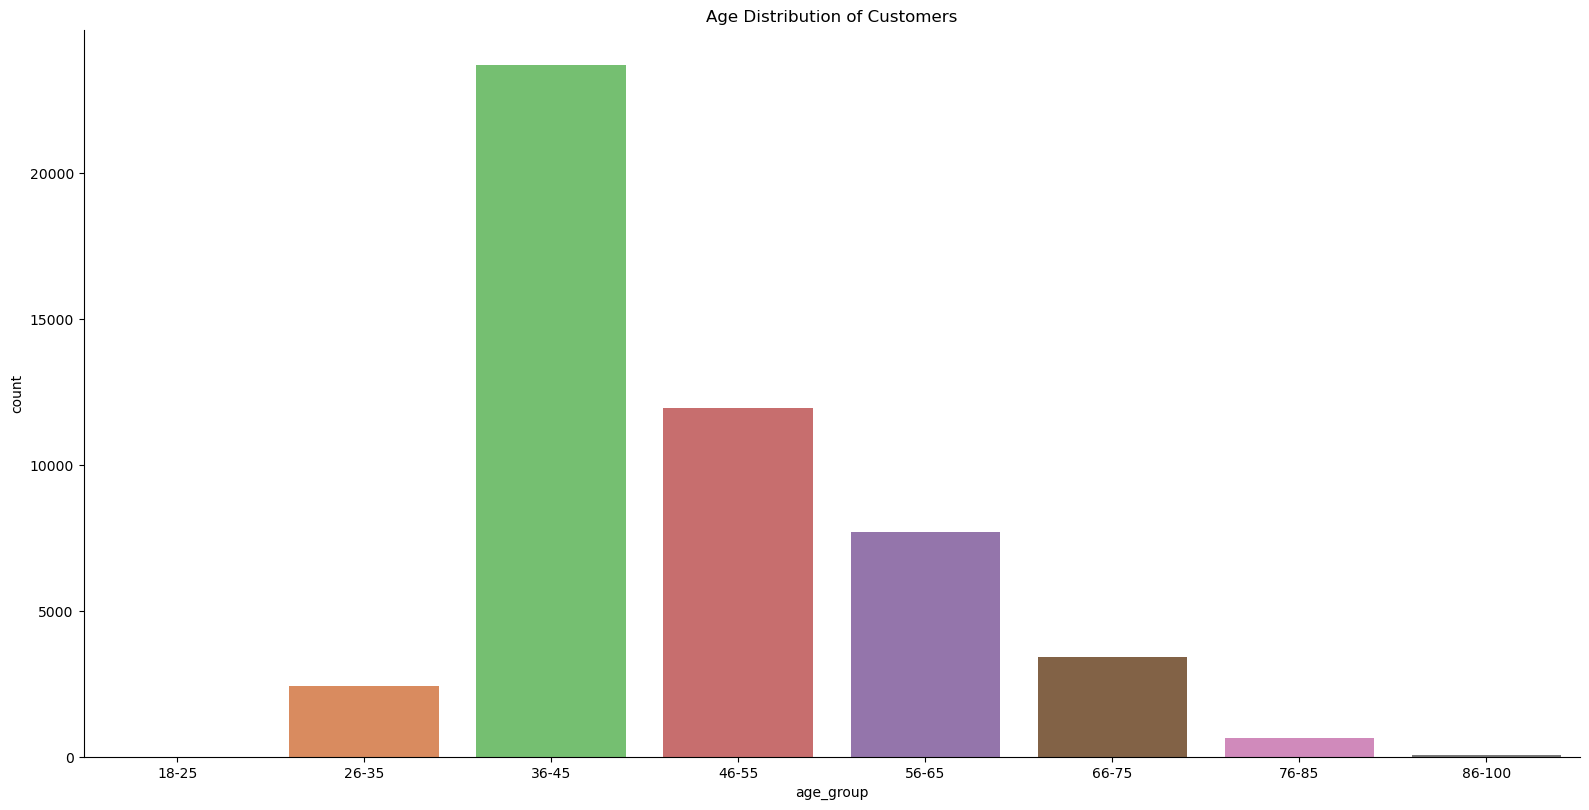

In [43]:
current_year = pd.to_datetime('now').year
df['age'] = current_year - df['birth_year']
sns.catplot(x='age_group', kind='count', data=df, palette='muted', height=8, aspect=2)
plt.title('Age Distribution of Customers')
plt.show()

C:\Users\charan.lalwani\Downloads\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


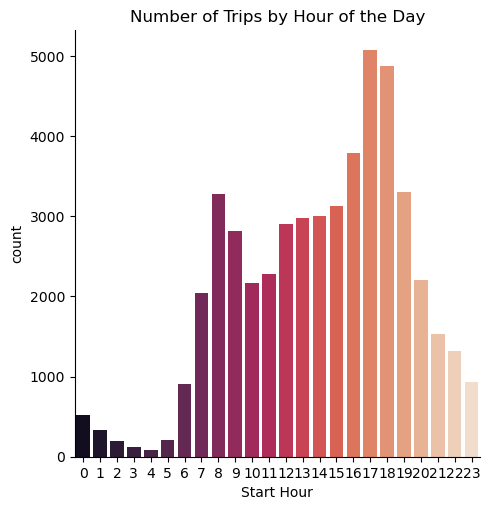

In [45]:
# Catplot for number of trips by hour of the day
sns.catplot(x='start_hour', kind='count', data=df, palette='rocket')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Start Hour')
plt.show()

## Some of the answers we could find out in this task are for the following questions
#### •Subscribers vs non subscribers as our main clientale?
#### •Which hour of the day is the busiest?
#### •What is the age group of most customers?

### The primary users of Citi Bikes are non-subscribers.

### Usage starts to increase from 12 PM onwards, reaching a peak between 5 PM and 6 PM, after which it experiences a decline.








### The age group ranging from 36 to 45 exhibits the largest customer base.








In [46]:
df.head()

trip_id  bike_id weekday  start_hour          start_time  start_station_id  \
0  LnQzQk    16013     NaN          18 2013-09-09 18:18:00               523   
1  IL9boN    15230     NaN          18 2013-09-12 18:38:00               257   
2  46clGB    17942     NaN          19 2013-09-18 19:44:00               479   
3  v7vdFt    19683     NaN          11 2013-09-28 11:54:00               527   
4  VGBsb5    18024     NaN          18 2013-09-07 18:08:00               521   

        start_station_name  start_station_latitude  start_station_longitude  \
0          W 38 St & 8 Ave               40.754666               -73.991382   
1  Lispenard St & Broadway               40.719392               -74.002472   
2          9 Ave & W 45 St               40.760193               -73.991255   
3          E 33 St & 1 Ave               40.743156               -73.974347   
4          8 Ave & W 31 St               40.750450               -73.994811   

             end_time  end_station_id     end_station_name  \
0 2013-09-09 18:35:00             334      W 20 St & 7 Ave   
1 2013-09-12 18:48:00             236  St Marks Pl & 2 Ave   
2 2013-09-18 19:50:00             513     W 56 St & 10 Ave   
3 2013-09-28 12:03:00             441      E 52 St & 2 Ave   
4 2013-09-07 18:46:00             476      E 31 St & 3 Ave   

   end_station_latitude  end_station_longitude  trip_duration      subscriber  \
0             40.742388             -73.997262            993      Subscriber   
1             40.728419             -73.987140            581      Subscriber   
2             40.768254             -73.988639            361      Subscriber   
3             40.756014             -73.967416            561      Subscriber   
4             40.743943             -73.979661           2296  Non-Subscriber   

   birth_year         gender   age age_group  
0      1968.0              2  56.0     56-65  
1      1983.0              1  41.0     36-45  
2      1989.0              1  35.0     36-45  
3      1988.0              2  36.0     36-45  
4      1985.0  Not Available  39.0     36-45

In [47]:
df.to_csv(os.path.join(r"C:\Users\charan.lalwani\Documents\cf\Achievement 6\New york citi bikes\Data\Prepared Data" ,"df.csv"), index=False)